In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import nblint


from pprint import pprint

from sklearn.metrics import accuracy_score

from skllm import MultiLabelZeroShotGPTClassifier
from skllm import ZeroShotGPTClassifier
from skllm.config import SKLLMConfig

Matplotlib created a temporary cache directory at /tmp/matplotlib-dyg_hyoe because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# set OpenAI Key
SKLLMConfig.set_openai_key(os.environ.get('OPENAI_API_KEY'))

In [3]:
# read in movie data downloaded from Kaggle
movies = pd.read_csv('movie_descriptions.txt', sep=' ::: ', engine='python', encoding='utf-8')

In [4]:
# shape and columns
print(str(movies.shape[0])+' movies\n')

for col in movies.columns:
    print(col)

54214 movies

ID
title
genre
synopsis


In [5]:
# what is the distribution of review scores?
movies.genre.value_counts().sort_index()

genre
action          1315
adult            590
adventure        775
animation        498
biography        265
comedy          7447
crime            505
documentary    13096
drama          13613
family           784
fantasy          323
game-show        194
history          243
horror          2204
music            731
musical          277
mystery          319
news             181
reality-tv       884
romance          672
sci-fi           647
short           5073
sport            432
talk-show        391
thriller        1591
war              132
western         1032
Name: count, dtype: int64

In [6]:
# check for missing data
print(movies.synopsis.isna().sum())
print(movies.genre.isna().sum())

0
0


In [7]:
# visual display of Likert values
movies.head(10)

,ID,title,genre,synopsis
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...
5,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm s...
6,7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all ...
7,8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen w...
8,9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss ..."
9,10,Spirits (2014/I),horror,Four high school students embark on a terrifyi...


In [8]:
movies = movies.assign(assign_genre = 'the genre of this movie is: '+movies.genre)
movies.head()

,ID,title,genre,synopsis,assign_genre
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,the genre of this movie is: drama
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,the genre of this movie is: thriller
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,the genre of this movie is: adult
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,the genre of this movie is: drama
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,the genre of this movie is: drama


In [9]:
some_movies = movies.groupby(movies.genre).head(10)
some_movies.head(15)

,ID,title,genre,synopsis,assign_genre
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,the genre of this movie is: drama
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,the genre of this movie is: thriller
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,the genre of this movie is: adult
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,the genre of this movie is: drama
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,the genre of this movie is: drama
5,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm s...,the genre of this movie is: documentary
6,7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all ...,the genre of this movie is: comedy
7,8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen w...,the genre of this movie is: crime
8,9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss ...",the genre of this movie is: reality-tv
9,10,Spirits (2014/I),horror,Four high school students embark on a terrifyi...,the genre of this movie is: horror


In [10]:
X = some_movies.synopsis
y = some_movies.assign_genre.unique()

clf = ZeroShotGPTClassifier(openai_model="gpt-4")
clf.fit(X, y)
labels = clf.predict(X)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 270/270 [16:24<00:00,  3.65s/it]


In [11]:
some_movies['model_label'] = labels

/tmp/ipykernel_6204/702712457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  some_movies['model_label'] = labels


In [12]:
some_movies.head()

,ID,title,genre,synopsis,assign_genre,model_label
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,the genre of this movie is: drama,the genre of this movie is: drama
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,the genre of this movie is: thriller,the genre of this movie is: thriller
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,the genre of this movie is: adult,the genre of this movie is: adult
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,the genre of this movie is: drama,the genre of this movie is: drama
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,the genre of this movie is: drama,the genre of this movie is: documentary


In [13]:
misses = some_movies.loc[some_movies.assign_genre != some_movies.model_label].head(10)
misses.head()

,ID,title,genre,synopsis,assign_genre,model_label
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,the genre of this movie is: drama,the genre of this movie is: documentary
8,9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss ...",the genre of this movie is: reality-tv,the genre of this movie is: documentary
15,16,Night Call (2016),drama,Simon's world is turned upside down when his l...,the genre of this movie is: drama,the genre of this movie is: thriller
24,25,Cheongchun highway (1973),action,Dong-woo is released from prison after a short...,the genre of this movie is: action,the genre of this movie is: drama
26,27,Riding Shotgun (2004),short,Brian Wallace is a cameraman for the hit TV sh...,the genre of this movie is: short,the genre of this movie is: crime


In [14]:
accuracy = accuracy_score(some_movies.assign_genre, some_movies.model_label)
print("{:.0f}%".format(accuracy*100))

55%


In [15]:
some_movies = some_movies.assign(correct = np.where(some_movies.assign_genre == some_movies.model_label, 1, 0))

In [16]:
acc_results = some_movies.groupby(by='genre').aggregate({'correct' : ['sum']})
acc_results['accuracy'] = acc_results.correct/10

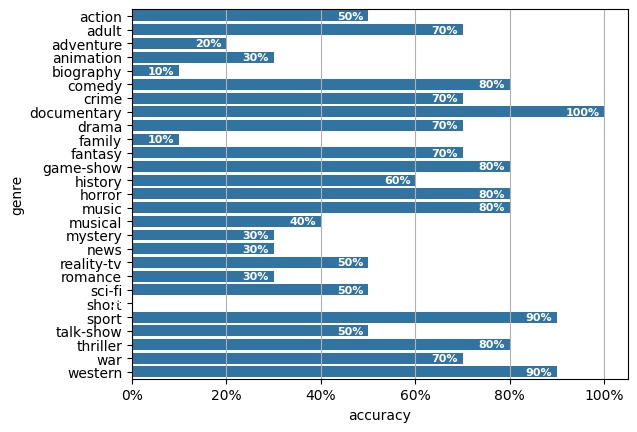

In [17]:
ax = sns.barplot(data=acc_results, y='genre', x='accuracy')

# Function to format the axis labels as percentages
def to_percent(y, position):
    s = "{:.0f}%".format(y * 100)
    return s

# Create your formatter object
formatter = FuncFormatter(to_percent)

ax.xaxis.set_major_formatter(formatter) #apply percentage format to x axis
ax.xaxis.grid(True) # add grid lines to compare bars

for p in ax.patches:
    width = p.get_width()
    ax.text(
        width - 0.01 * max(acc_results.accuracy),
        p.get_y() + p.get_height() / 2,
        to_percent(width, None),
        va='center',
        ha='right',
        size=8,
        color='white',
        weight='bold'
    )